In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

In [2]:
%matplotlib inline

In [3]:
matplotlib.rcParams["figure.figsize"] = (10.0,8.0)

In [4]:
#generating a dataset and plotting it
np.random.seed(0)

In [5]:
X,y = sklearn.datasets.make_moons(200,noise = 0.20)

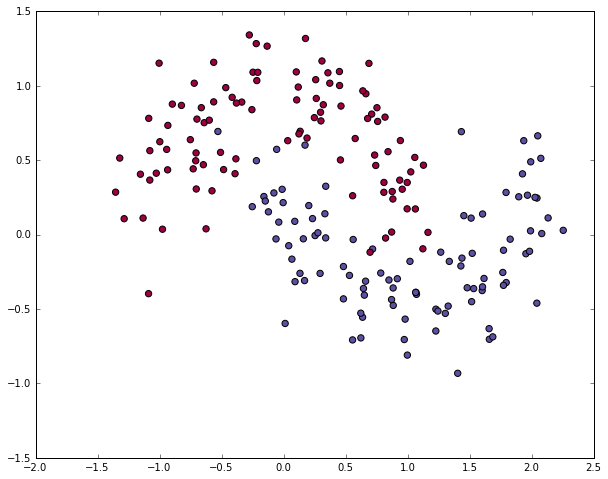

In [6]:
plt.scatter(X[:,0],X[:,1], s = 40, c = y, cmap = plt.cm.Spectral)

In [7]:
#train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()

In [8]:
clf.fit(X,y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [9]:
#helper function to plot a decision boundary
def plot_decision_boundary(pred_func):
    #set min and max values and give it some padding
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    h = 0.01
    #generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
    #predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #plot the contour and training examples
    plt.contourf(xx,yy,Z,cmap = plt.cm.Spectral)
    plt.scatter(X[:,0],X[:,1], c= y,cmap=plt.cm.Spectral)
    

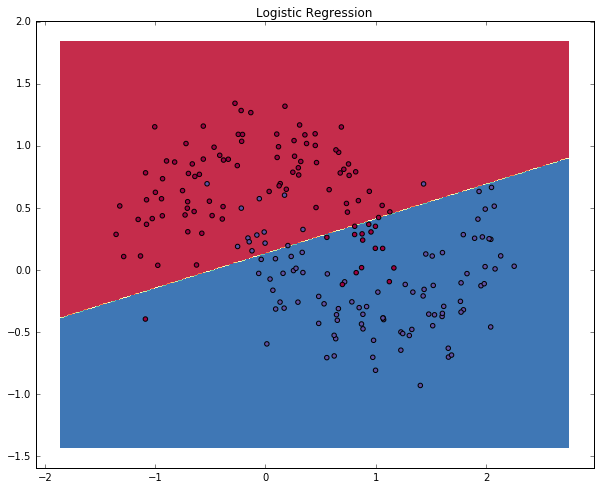

In [10]:
#plot the decision boundary
plot_decision_boundary(lambda x:clf.predict(x))
plt.title("Logistic Regression")

In [17]:
#implementation
num_examples = len(X) #training set size
nn_input_dim = 2 #input layer dimensionality
nn_output_dim = 2 #output layer dimensionality


In [12]:
#gradient descent parameters
epsilon = 0.01 #learning rate for gradient descent
reg_lambda = 0.01 #regularization strength

In [13]:
#implementing the loss function. It is used to evaluate how well our model is doing
#helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2,b2 = model["W1"], model["b1"], model["W2"], model["b2"]
    #forward propagation to calculate the predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    #calculating the loss
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)
    #add regularization term to loss
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [14]:
#helper function to predict the output of a network 0 or 1
def predict(model, x):
    W1, b1, W2,b2 = model["W1"], model["b1"], model["W2"], model["b2"]
    #forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    return np.argmax(probs, axis = 1)

In [24]:
#this function learns the parameters for the neural network and returns the model
#nn_hdim : Number of nodes in the hidden layer
#num_passes: Number of passes through the training data for gradient descent
#print_loss: if true, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print "Loss after iteration %i: %f" %(i, calculate_loss(model))
    
    return model

In [25]:
#network with hidden layer 3
model = build_model(3, print_loss = True)

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.069003
Loss after iteration 3000: 0.071218
Loss after iteration 4000: 0.071253
Loss after iteration 5000: 0.071278
Loss after iteration 6000: 0.071293
Loss after iteration 7000: 0.071303
Loss after iteration 8000: 0.071308
Loss after iteration 9000: 0.071312
Loss after iteration 10000: 0.071314
Loss after iteration 11000: 0.071315
Loss after iteration 12000: 0.071315
Loss after iteration 13000: 0.071316
Loss after iteration 14000: 0.071316
Loss after iteration 15000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


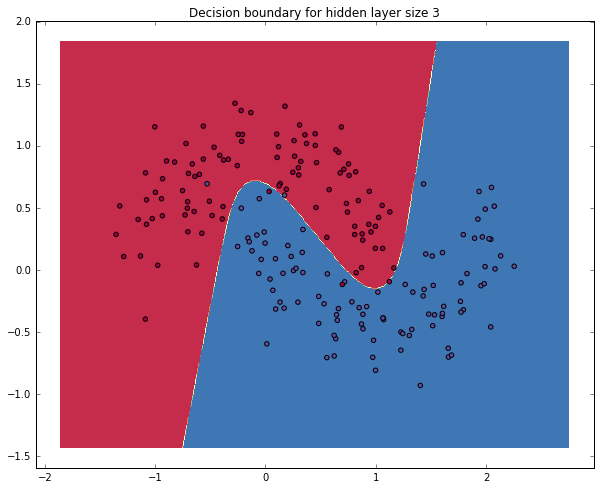

In [26]:
#plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision boundary for hidden layer size 3")

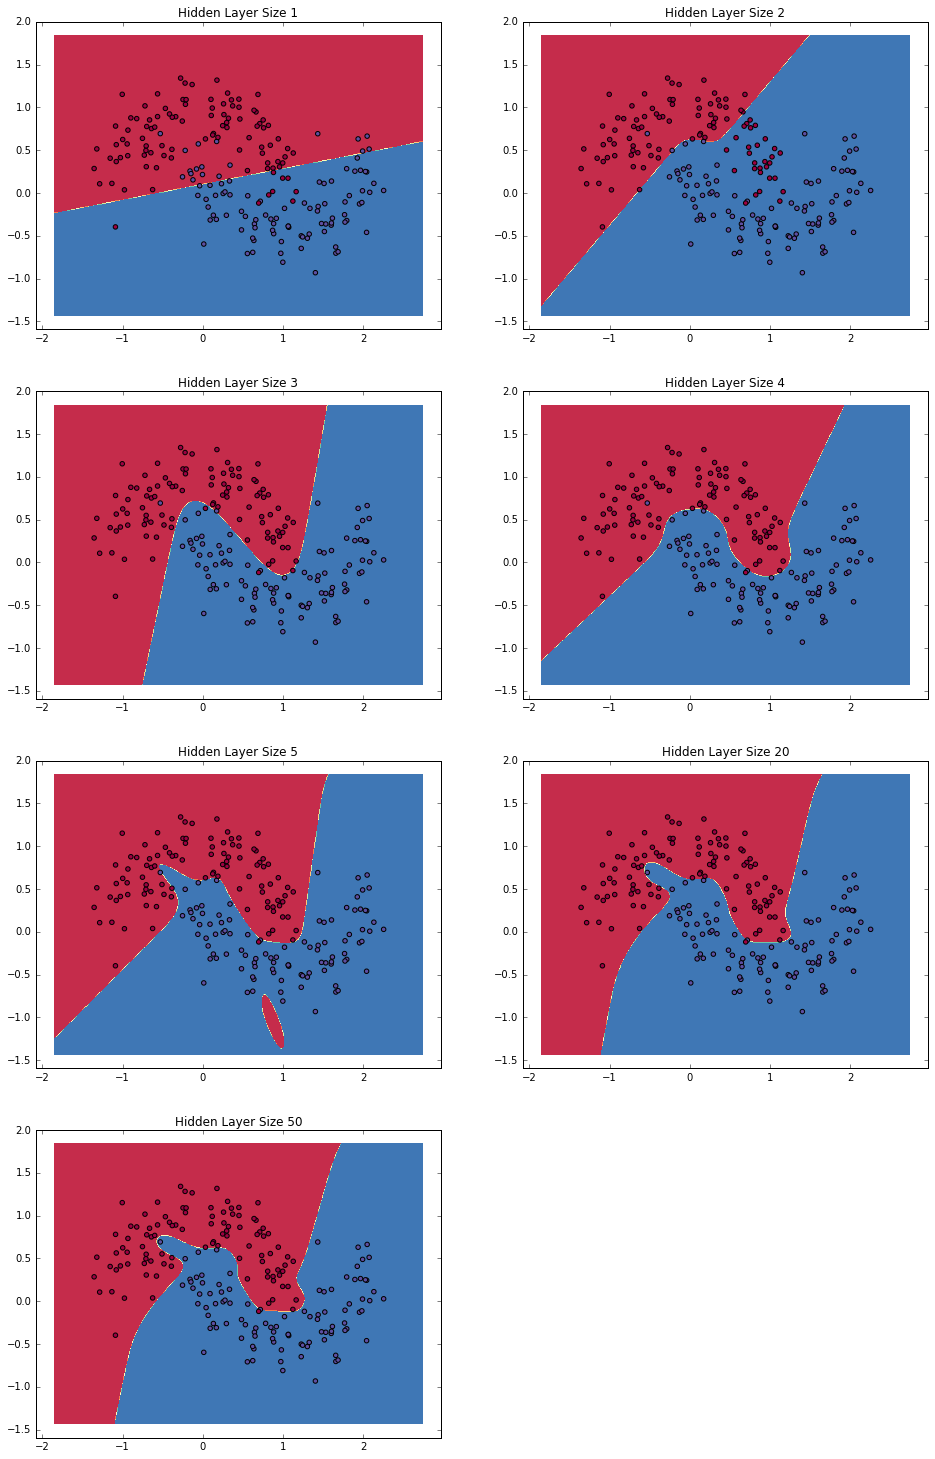

In [27]:
#varying the hidden layer size
plt.figure(figsize =(16,32))
hidden_layer_dimensions = [1,2,3,4,5,20,50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5,2,i+1)
    plt.title("Hidden Layer Size %d" %nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model,x))
plt.show()